# **REGRESIÓN LOGÍSTICA**

En este notebook crearemos un modelo de regresión logística para predecir si los clientes renovarán equipo o no.

Para ello iteraremos sobre distintos hiperparámetros y así obtener el modelo óptimo.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score

In [3]:
train = pd.read_csv("Dataset train.csv")
train.head()

,NUMPERIODO,nro_documento_hash,nro_telefono_hash,FECACTIVACIONCONTRATO_INT,FECINGRESOCLIENTE_INT,tipo1,tipo2,VCHMESADENDA,VCHPENALIDAD,alto,...,trafico_app_8,trafico_app_9,trafico_total,GIRO,SUBGIRO,TIENE_PROD_1,TIENE_PROD_2,TIENE_PROD_3,TARGET,PREV_TARGET
0,202201,5f58359a37ac456d9050c75aa36720b73063bf4b77f483...,9be57e3928a78ae85be270575f97e82a6bdbd59fc87281...,1072320.0,902100.0,1,0,0.0,0.00,1.0,...,0.000000,0.0,16606.140346,3e33e191fc2f1513037662f262867a04e278e8a0589a32...,8e0b81ed56b34766254d0492d32fa9d5d08a33690db2b6...,1,0,0,0.0,0.0
1,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,119dd6dff66e259a3996de7d885e2c54e8ed5874239346...,1072680.0,781560.0,1,0,7.6,365.57,1.0,...,180.536775,0.0,3705.222886,a9d0bcb92394bd06ed0e020135054d2dbf3e512fdf0b7f...,e159ded5abcf126e18b05856319e4a4ee58a3267f298fd...,1,0,0,0.0,0.0
2,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,73cec44593f362cccdb45773197a0bf2136978cb241c91...,1072680.0,781560.0,1,0,0.0,0.00,0.0,...,980.521564,0.0,4617.043791,a9d0bcb92394bd06ed0e020135054d2dbf3e512fdf0b7f...,e159ded5abcf126e18b05856319e4a4ee58a3267f298fd...,1,0,0,0.0,0.0
3,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,db86e518af696d60b247466fd1bb5823cf81a9442c16b2...,1072680.0,781560.0,0,1,0.0,0.00,0.0,...,0.000000,0.0,0.000000,a9d0bcb92394bd06ed0e020135054d2dbf3e512fdf0b7f...,e159ded5abcf126e18b05856319e4a4ee58a3267f298fd...,1,0,0,0.0,0.0
4,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,90d5ab1ad28da36b0fa821759b0a9df2b248dc92a557a5...,1072680.0,781560.0,1,0,0.0,0.00,1.0,...,37.027894,0.0,450.053533,a9d0bcb92394bd06ed0e020135054d2dbf3e512fdf0b7f...,e159ded5abcf126e18b05856319e4a4ee58a3267f298fd...,1,0,0,0.0,0.0


In [110]:
test = pd.read_csv("Dataset test.csv")
test.head()

,NUMPERIODO,nro_documento_hash,nro_telefono_hash,FECACTIVACIONCONTRATO_INT,FECINGRESOCLIENTE_INT,tipo1,tipo2,VCHMESADENDA,VCHPENALIDAD,alto,...,trafico_app_8,trafico_app_9,trafico_total,GIRO,SUBGIRO,TIENE_PROD_1,TIENE_PROD_2,TIENE_PROD_3,TARGET,PREV_TARGET
0,202204,5848c849c6e33ff61bc87f63781cec2cf5a38811446ec1...,ac8e7810e7d278b75f99a38183357eb28a2cb582f1875a...,1080060.0,1079280.0,1,0,0.0,0.0,0.0,...,0.000000,0.0,21631.486330,5b8e595b8cebb006e39a3d289e465a5718996785008cbb...,bd1b475ded03bdb3ab78de2f74782ad855c3c4b085d167...,0,0,0,NaN,0.0
1,202204,4623594982b1da7de047b2a10eba7533cc83a1b242167d...,93d2534f78d216261f0e0ce2e4d3e938f1d03fb8a4c766...,1080060.0,993180.0,1,0,0.0,0.0,1.0,...,0.000000,0.0,5449.355104,5b8e595b8cebb006e39a3d289e465a5718996785008cbb...,bd1b475ded03bdb3ab78de2f74782ad855c3c4b085d167...,0,0,0,NaN,0.0
2,202204,b38db111537bc0ebf7297373c3ba7114b6b74751195607...,0095dd8326c84eb25f2a2f888de98d29201dc9bd918829...,1080120.0,716760.0,0,1,0.0,0.0,1.0,...,0.000000,0.0,7566.943466,404a18af35694f85854d87b70591b07c315b4ce5f5c7cf...,6eceace9a0758d06fca1f7c802c8ae57ae21361ae0e6a3...,1,0,0,NaN,0.0
3,202204,b996b613a4f6cc9b938241b75a4fbde47bb8606938159b...,255a24c2b9ecb57e21346616932f52c9a12924f7bf4738...,1080120.0,912240.0,1,0,0.0,0.0,0.0,...,0.000000,0.0,19392.310549,47a5a3efcbc0c9667600a36756e35afd8ed48df33f7e9d...,6b30ae99766ae521a61dccfbebed9aace3f62e0412aa6f...,1,0,0,NaN,0.0
4,202204,d1a5dd4012b5399691b0dfe3b24d4f6a303765e0364cc2...,28257d69713585f4741944029f476de65c9eda832e3063...,1079040.0,1007520.0,0,1,0.0,0.0,0.0,...,218.083858,0.0,4611.995497,5b8e595b8cebb006e39a3d289e465a5718996785008cbb...,bd1b475ded03bdb3ab78de2f74782ad855c3c4b085d167...,1,0,0,NaN,0.0


In [4]:
train.columns

Index(['NUMPERIODO', 'nro_documento_hash', 'nro_telefono_hash',
       'FECACTIVACIONCONTRATO_INT', 'FECINGRESOCLIENTE_INT', 'tipo1', 'tipo2',
       'VCHMESADENDA', 'VCHPENALIDAD', 'alto', 'bajo', 'medio', 'muy alto',
       'NRO_GRUPOS', 'grupo_2', 'grupo_1', 'grupo_11', 'grupo_5', 'grupo_9',
       'grupo_10', 'grupo_3', 'grupo_7', 'grupo_4', 'grupo_8', 'grupo_6',
       'MINUTOS1', 'GIGAS1', 'MENSAJES1', 'MINUTOS2', 'GIGAS2', 'MENSAJES2',
       'MINUTOS3', 'GIGAS3', 'MENSAJES3', 'MINUTOS_TOTAL', 'MENSAJES_TOTAL',
       'GIGAS_TOTAL', 'MARCA', 'MODELO', 'OS', 'SMARTPHONE', 'gamma_1',
       'gamma_2', 'gamma_3', 'gamma_4', 'gamma_5', 'gamma_6', 'gamma_7',
       'LANZAMIENTO_INT', 'mins_flujo_1', 'mins_flujo_2', 'trafico_app_1',
       'trafico_app_2', 'trafico_app_3', 'trafico_app_4', 'trafico_app_5',
       'trafico_app_6', 'trafico_app_7', 'trafico_app_8', 'trafico_app_9',
       'trafico_total', 'GIRO', 'SUBGIRO', 'TIENE_PROD_1', 'TIENE_PROD_2',
       'TIENE_PROD_3', 'TARGET'

In [5]:
corr_df = train.corr()
corr_df.isnull().all(axis = 0).sum()

8

Existen 8 filas que tienen valores NaN en la matriz de correlación, esto quiere decir que dichas variables no guardan correlación con las demás, por lo que se reemplazarán esos valores en la matriz con ceros.

In [6]:
corr_df.fillna(0, inplace = True)

In [7]:
corr_target = np.abs(corr_df['TARGET']).sort_values(ascending = False)
corr_target[:10]

TARGET           1.000000
PREV_TARGET      0.380707
mins_flujo_1     0.039328
NRO_GRUPOS       0.039304
grupo_1          0.036447
trafico_total    0.032413
grupo_6          0.031059
grupo_10         0.026439
grupo_8          0.026224
mins_flujo_2     0.024990
Name: TARGET, dtype: float64

In [8]:
importance = corr_target.index.to_numpy()
importance[:10]

array(['TARGET', 'PREV_TARGET', 'mins_flujo_1', 'NRO_GRUPOS', 'grupo_1',
       'trafico_total', 'grupo_6', 'grupo_10', 'grupo_8', 'mins_flujo_2'],
      dtype=object)

[]

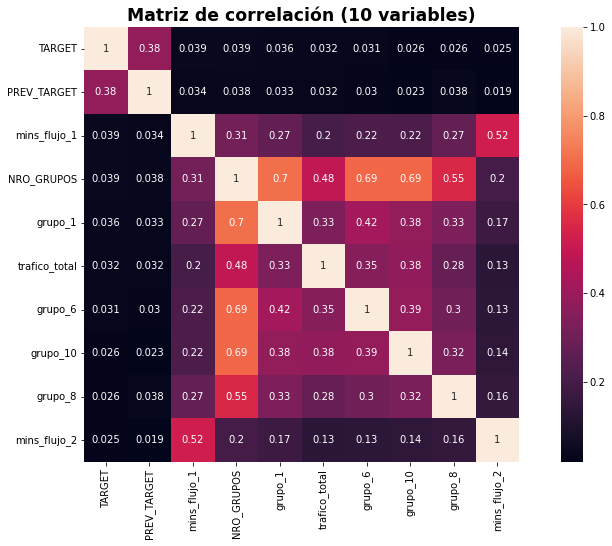

In [10]:
plt.figure(figsize = (15,8))
sns.heatmap(corr_df.loc[importance[:10], importance[:10]], annot = True, square = True)
plt.title('Matriz de correlación (10 variables)', size = 'xx-large', weight = 'bold')

plt.plot()

Vemos que la variables que guarda mayor correlación con la variable objetivo es *PREV_TARGET* (0.39), es decir, la renovación de un equipo depende en mayor medida si dicho equipo ha sido renovado el mes pasado. Las demás variables presentan una correlación considerablemente menor (la décima parte). 

Adicionalmente, se guardó el orden de la importancia de las variables predictoras en un arreglo que será utilizado para determinar el número óptimo de variables a utilizar en el modelo de regresión logística.

In [11]:
importance = np.delete(importance, 0)

In [12]:
train.shape

(547995, 68)

Existen casi 600 mil registros, por lo que el conjunto de entrenamiento se dividirá en 3 datasets:
* Train set: datos para entrenar los modelos (96%)
* Dev set: datos para comparar los modelos (2%: 11K)
* Test set: datos para probar los modelos (2%: 11K)

Los datasets de validación y prueba deben contener una cantidad de registros positivos (TARGET = 1) que refleje la proporción de registros positivos existentes en el dataset general.

In [13]:
pos_records = train[train['TARGET'] == 1]
pos_records.shape

(16472, 68)

In [14]:
neg_records = train[train['TARGET'] == 0]
neg_records.shape

(531523, 68)

In [15]:
X_pos = pos_records.loc[:, pos_records.columns != "TARGET"]
Y_pos = pos_records.loc[:, "TARGET"]
X_neg = neg_records.loc[:, neg_records.columns != "TARGET"]
Y_neg = neg_records.loc[:, "TARGET"]

In [16]:
X_train_pos, X_rem_pos, Y_train_pos, Y_rem_pos = train_test_split(X_pos, Y_pos, test_size = 0.04, shuffle = True, random_state = 0)
X_dev_pos, X_test_pos, Y_dev_pos, Y_test_pos = train_test_split(X_rem_pos, Y_rem_pos, test_size = 0.5, shuffle = True, random_state = 0)

X_train_neg, X_rem_neg, Y_train_neg, Y_rem_neg = train_test_split(X_neg, Y_neg, test_size = 0.04, shuffle = True, random_state = 0)
X_dev_neg, X_test_neg, Y_dev_neg, Y_test_neg = train_test_split(X_rem_neg, Y_rem_neg, test_size = 0.5, shuffle = True, random_state = 0)

X_train = pd.concat([X_train_pos, X_train_neg], axis = 0)
Y_train = pd.concat([Y_train_pos, Y_train_neg], axis = 0)
X_dev = pd.concat([X_dev_pos, X_dev_neg], axis = 0)
Y_dev = pd.concat([Y_dev_pos, Y_dev_neg], axis = 0)
X_test = pd.concat([X_test_pos, X_test_neg], axis = 0)
Y_test = pd.concat([Y_test_pos, Y_test_neg], axis = 0)

In [17]:
print("X_train size: {}".format(X_train.shape))
print("Y_train size: {}".format(Y_train.shape))
print("X_dev size: {}".format(X_dev.shape))
print("Y_dev size: {}".format(Y_dev.shape))
print("X_test size: {}".format(X_test.shape))
print("Y_test size: {}".format(Y_test.shape))

X_train size: (526075, 67)
Y_train size: (526075,)
X_dev size: (10959, 67)
Y_dev size: (10959,)
X_test size: (10961, 67)
Y_test size: (10961,)


In [18]:
print("Proportion train set: {:.3f} %".format(Y_train.value_counts()[1]/Y_train.shape[0] * 100))
print("Proportion dev set: {:.3f} %".format(Y_dev.value_counts()[1]/Y_dev.shape[0] * 100))
print("Proportion test set: {:.3f} %".format(Y_test.value_counts()[1]/Y_test.shape[0] * 100))

Proportion train set: 3.006 %
Proportion dev set: 3.002 %
Proportion test set: 3.011 %


In [138]:
num_variables = np.append(np.arange(10, 70, 10), np.array([X_train.shape[1]]))
C = np.logspace(-3, 3, 7)
print("Num. variables: {}".format(num_variables))
print("C: {}".format(C))

Num. variables: [10 20 30 40 50 60 67]
C: [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


In [142]:
import warnings
warnings.filterwarnings("ignore")

In [144]:
model = Pipeline([('scaler', MinMaxScaler()), ('logistic', LogisticRegression(penalty = 'l2', max_iter = 200))])
results = []

for c in C:

    model.set_params(logistic__C = c)

    for i in num_variables:

        model.fit(X_train[importance[:i]], Y_train)

        y_train_preds = model.predict_proba(X_train[importance[:i]])
        auc_score_train = roc_auc_score(Y_train, y_train_preds[:,1])
        
        y_dev_preds = model.predict_proba(X_dev[importance[:i]])
        auc_score_dev = roc_auc_score(Y_dev, y_dev_preds[:,1])
        
        if i == X_train.shape[1]:
            print("C = {}".format(c))
            print("Nro variables = {}".format(i))
            print("Train score: {}".format(auc_score_train))
            print("Dev score: {}".format(auc_score_dev))

        results.append([c, i, auc_score_train, auc_score_dev])

C = 0.001
Nro variables = 67
Train score: 0.7192482184322834
Dev score: 0.7157528586583248
C = 0.01
Nro variables = 67
Train score: 0.7275494740197429
Dev score: 0.7293217280907679
C = 0.1
Nro variables = 67
Train score: 0.735112053603358
Dev score: 0.7373797276161119
C = 1.0
Nro variables = 67
Train score: 0.7386486511726266
Dev score: 0.7367003405513444
C = 10.0
Nro variables = 67
Train score: 0.7394018441296575
Dev score: 0.736942529458692
C = 100.0
Nro variables = 67
Train score: 0.7393779865989205
Dev score: 0.7367540967669068
C = 1000.0
Nro variables = 67
Train score: 0.7395013110497708
Dev score: 0.7368047076719842


In [152]:
results_df = pd.DataFrame(np.array(results), columns = ['C', 'Nro variables', 'Train score', 'Dev score'])
results_df.sort_values(by = ['Dev score', 'Train score'], ascending = False).head()

,C,Nro variables,Train score,Dev score
19,0.1,60.0,0.735112,0.737380
20,0.1,67.0,0.735112,0.737380
18,0.1,50.0,0.735102,0.737355
32,10.0,50.0,0.739492,0.737153
46,1000.0,50.0,0.739596,0.737017


Vemos que el numero de variables óptimo está entre 50 y 67, mientras que el valor de C óptimo está entre 0.1 y 100 (no contaremos el 1000 en este caso). Volveremos a iterar sobre estos rangos para obtener los parámetros óptimos.

In [157]:
num_variables = np.append(np.arange(50, 67, 3), np.array([67]))
C = np.logspace(-1, 1, 7)
print("Num. variables: {}".format(num_variables))
print("C: {}".format(C))

Num. variables: [50 53 56 59 62 65 67]
C: [ 0.1         0.21544347  0.46415888  1.          2.15443469  4.64158883
 10.        ]


In [158]:
model = Pipeline([('scaler', MinMaxScaler()), ('logistic', LogisticRegression(penalty = 'l2', max_iter = 500))])
results2 = []

for c in C:

    model.set_params(logistic__C = c)

    for i in num_variables:

        model.fit(X_train[importance[:i]], Y_train)

        y_train_preds = model.predict_proba(X_train[importance[:i]])
        auc_score_train = roc_auc_score(Y_train, y_train_preds[:,1])
        
        y_dev_preds = model.predict_proba(X_dev[importance[:i]])
        auc_score_dev = roc_auc_score(Y_dev, y_dev_preds[:,1])
        
        if i == X_train.shape[1]:
            print("C = {}".format(c))
            print("Nro variables = {}".format(i))
            print("Train score: {}".format(auc_score_train))
            print("Dev score: {}".format(auc_score_dev))

        results2.append([c, i, auc_score_train, auc_score_dev])

C = 0.1
Nro variables = 67
Train score: 0.735112053603358
Dev score: 0.7373797276161119
C = 0.21544346900318834
Nro variables = 67
Train score: 0.7369015875249669
Dev score: 0.7379430241302503
C = 0.46415888336127786
Nro variables = 67
Train score: 0.7380349019698274
Dev score: 0.7368487420187747
C = 1.0
Nro variables = 67
Train score: 0.7387265392232054
Dev score: 0.7366883311840378
C = 2.1544346900318834
Nro variables = 67
Train score: 0.7391583054901967
Dev score: 0.7366337171565249
C = 4.6415888336127775
Nro variables = 67
Train score: 0.7394428102095998
Dev score: 0.7365336390956375
C = 10.0
Nro variables = 67
Train score: 0.7396269434103845
Dev score: 0.7365871093738832


In [159]:
results2_df = pd.DataFrame(np.array(results2), columns = ['C', 'Nro variables', 'Train score', 'Dev score'])
results2_df.sort_values(by = ['Dev score', 'Train score'], ascending = False).head()

,C,Nro variables,Train score,Dev score
7,0.215443,50.0,0.736900,0.737980
8,0.215443,53.0,0.736909,0.737957
10,0.215443,59.0,0.736906,0.737949
9,0.215443,56.0,0.736902,0.737943
11,0.215443,62.0,0.736902,0.737943


Con esta iteración comprobamos que el valor óptimo de C es 0.215443, mientras que el número óptimo de variables a utilizar es 50. Con estos valores crearemos el modelo de regresión logística a utilizar.

In [161]:
model = Pipeline([('scaler', MinMaxScaler()), ('logistic', LogisticRegression(C = 0.215443, penalty = 'l2', max_iter = 1000))])

model.fit(X_train[importance[:50]], Y_train)

y_train_preds = model.predict_proba(X_train[importance[:50]])
auc_score_train = roc_auc_score(Y_train, y_train_preds[:,1])

y_dev_preds = model.predict_proba(X_dev[importance[:50]])
auc_score_dev = roc_auc_score(Y_dev, y_dev_preds[:,1])

y_test_preds = model.predict_proba(X_test[importance[:50]])
auc_score_test = roc_auc_score(Y_test, y_test_preds[:,1])

print("Train AUC score: {}".format(auc_score_train))
print("Dev AUC score: {}".format(auc_score_dev))
print("Test AUC score: {}".format(auc_score_test))

Train AUC score: 0.7369179323892856
Dev AUC score: 0.7379687584887641
Test AUC score: 0.7304250291457517


Procedemos a guardar el modelo, para ello usaremos la librería *joblib*.

In [162]:
import joblib

joblib.dump(model, 'logistic_regresion_model.pkl')

['logistic_regresion_model.pkl']

Finalmente, realizaremos las predicciones de la renovación para el mes de abril.

In [167]:
test.drop('TARGET', axis = 1, inplace = True)

In [169]:
test[importance[:50]].head()

,PREV_TARGET,mins_flujo_1,NRO_GRUPOS,grupo_1,trafico_total,grupo_6,grupo_10,grupo_8,mins_flujo_2,FECACTIVACIONCONTRATO_INT,...,GIGAS1,TIENE_PROD_2,MINUTOS_TOTAL,MINUTOS2,trafico_app_6,NUMPERIODO,gamma_2,trafico_app_7,trafico_app_8,trafico_app_1
0,0.0,583.400000,8.0,1.0,21631.486330,1.0,1.0,1.0,626.033333,1080060.0,...,0.0,0,0.0,0.0,0.0,202204,0.0,0.00000,0.000000,0.294108
1,0.0,367.933333,2.0,0.0,5449.355104,1.0,0.0,1.0,733.216667,1080060.0,...,0.0,0,0.0,0.0,0.0,202204,0.0,0.00000,0.000000,0.074603
2,0.0,178.833333,2.0,0.0,7566.943466,1.0,0.0,1.0,258.266667,1080120.0,...,0.0,0,0.0,0.0,0.0,202204,0.0,0.00000,0.000000,0.000000
3,0.0,789.283333,6.0,1.0,19392.310549,1.0,1.0,1.0,794.816667,1080120.0,...,0.0,0,0.0,0.0,0.0,202204,0.0,0.00000,0.000000,0.206282
4,0.0,125.566667,5.0,1.0,4611.995497,1.0,1.0,1.0,256.616667,1079040.0,...,0.0,0,0.0,0.0,0.0,202204,0.0,2.03855,218.083858,19.561513


In [173]:
target_abril = model.predict_proba(test[importance[:50]])
target_abril

array([[0.98720838, 0.01279162],
       [0.98817351, 0.01182649],
       [0.98925696, 0.01074304],
       ...,
       [0.98906101, 0.01093899],
       [0.98933888, 0.01066112],
       [0.9883049 , 0.0116951 ]])

In [175]:
predictions = test[['nro_telefono_hash']]
predictions['TARGET'] = target_abril[:,1]
predictions.head()

,nro_telefono_hash,TARGET
0,ac8e7810e7d278b75f99a38183357eb28a2cb582f1875a...,0.012792
1,93d2534f78d216261f0e0ce2e4d3e938f1d03fb8a4c766...,0.011826
2,0095dd8326c84eb25f2a2f888de98d29201dc9bd918829...,0.010743
3,255a24c2b9ecb57e21346616932f52c9a12924f7bf4738...,0.011414
4,28257d69713585f4741944029f476de65c9eda832e3063...,0.015190


In [177]:
predictions.to_csv('logistic_regresion_predictions.csv', index = False)